In [1]:
import pandas as pd
from lib.data_utils import fetch_and_prepare_data

sample_size = 100
try:
    data_df = pd.read_csv('data_samples/paragraph-questions-100.csv')
    print('Dataset already exists.')
except FileNotFoundError:
    data_df = await fetch_and_prepare_data(sample_size)
    data_df.to_csv('data_samples/paragraph-questions-100.csv', index=False)
data_df

Dataset already exists.


,_sa_instance_state_question,text_question,paragraph_id,scope,timestamp,downvote,id_question,context,author_id,upvote,...,setting,id_answer,text,_sa_instance_state_rating,author_id_rating,text_rating,value,id_rating,answer_id,timestamp_rating
0,<sqlalchemy.orm.state.InstanceState object at ...,What was the original project name that Rick D...,572529,single-paragraph,2024-05-16 19:28:58,0,888913,"In an article about 'ZX Spectrum', section 'Si...",8,0,...,ic,1852625,"The original project name was the ""ZX82"".",<sqlalchemy.orm.state.InstanceState object at ...,7,The answer provided is a direct quote from the...,5,1852426,1852625,2024-05-16 19:29:10
1,<sqlalchemy.orm.state.InstanceState object at ...,Which Bob Dylan song was rearranged for sopran...,186650,single-paragraph,2024-05-02 13:59:36,0,159327,In an article about 'Chimes of Freedom ( song ...,8,0,...,ic,317674,"""Chimes of Freedom"" was one of the Bob Dylan s...",<sqlalchemy.orm.state.InstanceState object at ...,7,The answer is mostly correct as it accurately ...,4,317530,317674,2024-05-02 13:59:48
2,<sqlalchemy.orm.state.InstanceState object at ...,"Who wrote all the lyrics for ""The Pale Emperor""?",450153,single-paragraph,2024-05-02 03:32:01,0,128246,"In an article about 'The Pale Emperor', sectio...",8,0,...,ic,255541,"Marilyn Manson wrote all the lyrics for ""The P...",<sqlalchemy.orm.state.InstanceState object at ...,7,The answer accurately states that Marilyn Mans...,5,255392,255541,2024-05-02 03:32:18
3,<sqlalchemy.orm.state.InstanceState object at ...,Which music video won the MTV Video Music Awar...,25529,single-paragraph,2024-05-13 01:57:22,0,761452,"In an article about 'Fifteen ( song )', sectio...",8,0,...,ic,1564683,The music video that won the MTV Video Music A...,<sqlalchemy.orm.state.InstanceState object at ...,7,"This answer is fully accurate and detailed, pr...",5,1564507,1564683,2024-05-13 01:57:42
4,<sqlalchemy.orm.state.InstanceState object at ...,Where was Erich von Manstein sent to command t...,488081,single-paragraph,2024-05-12 17:57:02,0,747305,"In an article about 'Erich von Manstein', sect...",8,0,...,ic,1533736,Erich von Manstein was sent to Stettin to comm...,<sqlalchemy.orm.state.InstanceState object at ...,7,The answer provided is fully accurate and deta...,5,1533556,1533736,2024-05-12 17:57:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,<sqlalchemy.orm.state.InstanceState object at ...,What type of content did DC Comics emphasize i...,145009,single-paragraph,2024-05-07 14:01:34,0,476221,"In an article about 'Batman', section 'Publica...",8,0,...,ic,955321,DC Comics emphasized lighthearted juvenile fan...,<sqlalchemy.orm.state.InstanceState object at ...,7,The answer accurately and directly quotes the ...,5,955146,955321,2024-05-07 14:02:25
96,<sqlalchemy.orm.state.InstanceState object at ...,What is the name of the Hellyeah album that wa...,79629,single-paragraph,2024-05-03 01:24:00,0,172897,"In an article about 'Hellyeah', section 'Disco...",8,0,...,ic,344828,"The answer is ""Band of Brothers"". The London S...",<sqlalchemy.orm.state.InstanceState object at ...,7,This answer is fully accurate and detailed. It...,5,344666,344828,2024-05-03 01:24:59
97,<sqlalchemy.orm.state.InstanceState object at ...,Where does Rachel work to support herself afte...,419936,single-paragraph,2024-05-05 01:52:13,0,313362,"In an article about 'Friends', section 'Premise'",8,0,...,ic,625738,"Rachel works as a waitress at Central Perk, a ...",<sqlalchemy.orm.state.InstanceState object at ...,7,The answer accurately states that Rachel works...,5,625578,625738,2024-05-05 01:52:50
98,<sqlalchemy.orm.state.InstanceState object at ...,"What era is depicted in the movie ""Blues in th...",791739,single-paragraph,2024-05-02 16:55:02,0,168007,"In an article about 'Robert Rossen', section '...",8,0,...,ic,335058,"The movie ""Blues in the Night"" depicts the Gre...",<sqlalchemy.orm.state.InstanceState object at ...,7,"The answ

In [3]:
from lib.llm_utils import generate_and_rate_answers
from fleecekmbackend.core.config import DATABASE_URL
from sqlalchemy.ext.asyncio import create_async_engine, AsyncSession
from sqlalchemy.orm import sessionmaker

try: 
    results_df = pd.read_csv('data_samples/paragraph-questions-100-short-answers-raw.csv')
    print('Results already exist.')
except:
    engine = create_async_engine(DATABASE_URL, echo=False)
    async_session = sessionmaker(engine, expire_on_commit=False, class_=AsyncSession)

    questions = data_df[['id_question', 'paragraph_id', 'text_question']].rename(columns={
            'id_question': 'id',
            'paragraph_id': 'paragraph_id',
            'text_question': 'text'
        }).to_dict(orient='records')

    async with async_session() as session:
        results_df = await generate_and_rate_answers(session, questions)
    results_df.to_csv('data_samples/paragraph-questions-100-short-answers-raw.csv', index=False)

# Merge the results with the original data_df
merged_df = pd.merge(data_df, results_df, left_on='id_question', right_on='question_id', how='left', suffixes=('_data', '_results'))

# Save the merged DataFrame to a CSV file
merged_df.to_csv('data_samples/paragraph-questions-100-short-answers.csv', index=False)

# Display the merged DataFrame
merged_df


Results already exist.


,_sa_instance_state_question,text_question,paragraph_id,scope,timestamp,downvote,id_question,context,author_id,upvote,...,2_words_answer_id,2_words_answer_text,2_words_answer_rating_id,2_words_answer_rating_score,2_words_answer_rating_rationale,few_words_answer_id,few_words_answer_text,few_words_answer_rating_id,few_words_answer_rating_score,few_words_answer_rating_rationale
0,<sqlalchemy.orm.state.InstanceState object at ...,What was the original project name that Rick D...,572529,single-paragraph,2024-05-16 19:28:58,0,888913,"In an article about 'ZX Spectrum', section 'Si...",8,0,...,2639775.0,ZX82,2639549.0,5.0,"The answer ""ZX82"" is a direct quote from the p...",2639779.0,"The original project name was ""ZX82"".",2639553.0,5.0,The answer provided is a direct quote from the...
1,<sqlalchemy.orm.state.InstanceState object at ...,Which Bob Dylan song was rearranged for sopran...,186650,single-paragraph,2024-05-02 13:59:36,0,159327,In an article about 'Chimes of Freedom ( song ...,8,0,...,2639787.0,"""Chimes""",2639561.0,2.0,"The answer `""Chimes""` is partially correct bec...",2639791.0,"""Chimes of Freedom"".",2639565.0,4.0,"The answer `""Chimes of Freedom""` is mostly cor..."
2,<sqlalchemy.orm.state.InstanceState object at ...,"Who wrote all the lyrics for ""The Pale Emperor""?",450153,single-paragraph,2024-05-02 03:32:01,0,128246,"In an article about 'The Pale Emperor', sectio...",8,0,...,2639798.0,Marilyn,2639572.0,2.0,"The answer ""Marilyn"" is partially correct beca...",2639802.0,Marilyn Manson.,2639576.0,5.0,"The answer ""Marilyn Manson"" is fully accurate ..."
3,<sqlalchemy.orm.state.InstanceState object at ...,Which music video won the MTV Video Music Awar...,25529,single-paragraph,2024-05-13 01:57:22,0,761452,"In an article about 'Fifteen ( song )', sectio...",8,0,...,2639810.0,Bad Romance,2639584.0,5.0,"The answer ""Bad Romance"" is fully accurate and...",2639815.0,"Lady Gaga's ""Bad Romance"".",2639589.0,5.0,"The answer ""Lady Gaga's 'Bad Romance'"" is full..."
4,<sqlalchemy.orm.state.InstanceState object at ...,Where was Erich von Manstein sent to command t...,488081,single-paragraph,2024-05-12 17:57:02,0,747305,"In an article about 'Erich von Manstein', sect...",8,0,...,2639821.0,Stettin.,2639595.0,5.0,"The answer ""Stettin"" is fully accurate and det...",2639824.0,Stettin.,2639598.0,5.0,"The answer ""Stettin"" is fully accurate and det..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,<sqlalchemy.orm.state.InstanceState object at ...,What type of content did DC Comics emphasize i...,145009,single-paragraph,2024-05-07 14:01:34,0,476221,"In an article about 'Batman', section 'Publica...",8,0,...,2640825.0,Juvenile,2640599.0,4.0,"The answer ""Juvenile"" is mostly correct, as it...",2640829.0,Lighthearted juvenile fantasy.,2640603.0,5.0,"The answer ""Lighthearted juvenile fantasy"" is ..."
96,<sqlalchemy.orm.state.InstanceState object at ...,What is the name of the Hellyeah album that wa...,79629,single-paragraph,2024-05-03 01:24:00,0,172897,"In an article about 'Hellyeah', section 'Disco...",8,0,...,2640838.0,Band Brothers,2640612.0,4.0,"The answer ""Band Brothers"" is mostly correct b...",2640841.0,Band of Brothers.,2640615.0,5.0,"The answer ""Band of Brothers"" is fully accurat..."
97,<sqlalchemy.orm.state.InstanceState object at ...,Where does Rachel work to support herself afte...,419936,single-paragraph,2024-05-05 01:52:13,0,313362,"In an article about 'Friends', section 'Premise'",8,0,...,2640848.0,Central Perk.,2640622.0,5.0,"The answer ""Central Perk"" is fully accurate an...",2640851.0,"Central Perk, a Manhattan coffeehouse.",2640625.0,5.0,"The answer ""Central Perk, a Manhattan coffeeho..."
98,<sqlalchemy.orm.state.InstanceState object at ...,"What era is depicted in the movie ""Blues in th...",791739,single-paragraph,2024-05-02 16:55:02,0,168007,"In an article about 'Robert Rossen', section '...",8,0,...,2640859.0,The,2640633.0,1.0,"The answer provided, ""Th

In [19]:
from lib.llm_utils import PROMPT_TYPES

merged_df = pd.read_csv('data_samples/paragraph-questions-100-short-answers.csv')

rating_columns = {
    '1_word_answer_rating_score': '1 word rating',
    '2_words_answer_rating_score': '2 word rating',
    '3_words_answer_rating_score': '3 word rating',
    '4_words_answer_rating_score': '4 word rating',
    '5_words_answer_rating_score': '5 word rating',
    'few_words_answer_rating_score': 'few word rating',
}

answer_columns = [prompt + '_answer_text' for prompt in PROMPT_TYPES]

rating_data = merged_df[list(rating_columns.keys()) + answer_columns].rename(columns=rating_columns)

rating_stats = rating_data.describe().T[['mean', 'std']]

golden_answer_mean = data_df['value'].mean()
golden_answer_std = data_df['value'].std()

rating_stats.loc['golden answer rating'] = [golden_answer_mean, golden_answer_std]

rating_stats

,mean,std
1 word rating,3.91,1.272038
2 word rating,4.18,1.095261
3 word rating,4.46,0.881000
4 word rating,4.61,0.737111
5 word rating,4.76,0.570663
few word rating,4.86,0.471833
golden answer rating,4.95,0.329524


In [17]:
word_counts = rating_data[answer_columns].applymap(lambda x: len(str(x).split()))
word_counts.columns = [column.split("_")[0] + ' word answer' for column in word_counts.columns]
word_count_stats = word_counts.describe().T[['mean', 'std']]

golden_answer_word_count = data_df['text'].apply(lambda x: len(str(x).split()))
word_count_stats.loc['golden answer'] = [golden_answer_word_count.mean(), golden_answer_word_count.std()]

word_count_stats

/tmp/ipykernel_2129957/3475700833.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  word_counts = rating_data[answer_columns].applymap(lambda x: len(str(x).split()))


,mean,std
5 word answer,2.93,1.165627
4 word answer,2.50,0.810287
3 word answer,1.95,0.641573
2 word answer,1.43,0.573048
1 word answer,1.11,0.490207
few word answer,5.48,6.257892
golden answer,16.02,10.608725


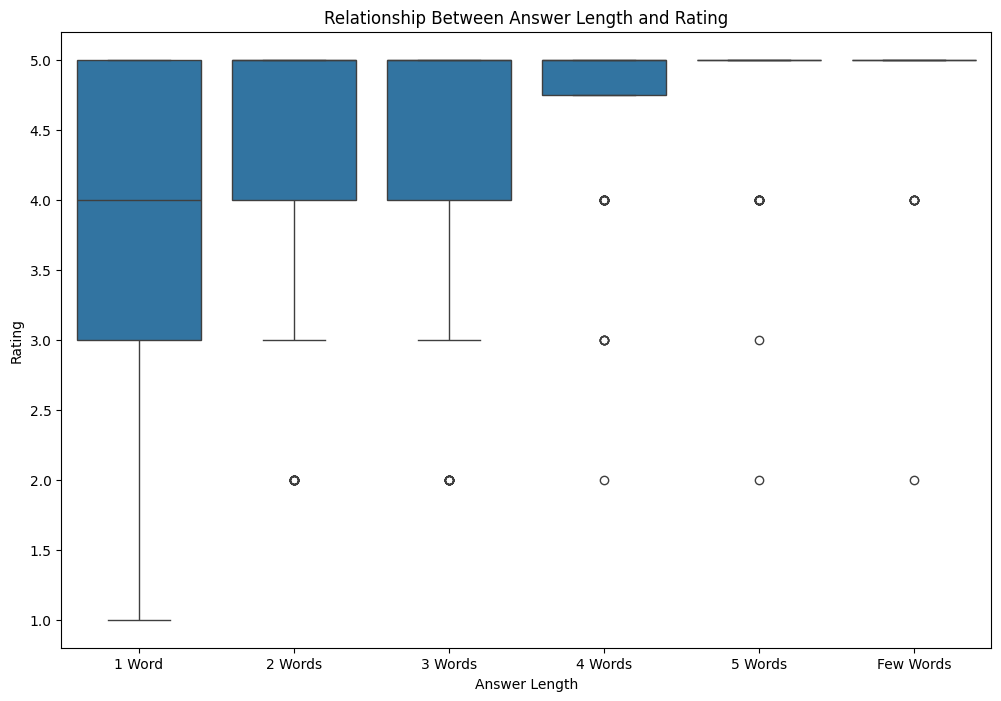

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged DataFrame
merged_df = pd.read_csv('data_samples/paragraph-questions-100-short-answers.csv')

# Prepare the data for visualization
# Extracting relevant columns and renaming for clarity
rating_columns = {
    '1_word_answer_rating_score': '1 Word',
    '2_words_answer_rating_score': '2 Words',
    '3_words_answer_rating_score': '3 Words',
    '4_words_answer_rating_score': '4 Words',
    '5_words_answer_rating_score': '5 Words',
    'few_words_answer_rating_score': 'Few Words'
}

# Select and rename columns
rating_data = merged_df[list(rating_columns.keys())].rename(columns=rating_columns)

# Melt the DataFrame to have a long-form DataFrame suitable for seaborn
melted_data = rating_data.melt(var_name='Answer Length', value_name='Rating')

# Plot the data
plt.figure(figsize=(12, 8))
ax = plt.subplot()

# Create boxplot
boxplot = sns.boxplot(x='Answer Length', y='Rating', data=melted_data, ax=ax)

# Set plot title and labels
ax.set_title('Relationship Between Answer Length and Rating')
ax.set_xlabel('Answer Length')
ax.set_ylabel('Rating')

# Show plot
plt.show()


In [25]:
merged_df[['context']]

,context
0,"In an article about 'Photography in Denmark', ..."
1,"In an article about 'Antimony', section 'Appli..."
2,"In an article about 'Bunnies & Burrows', secti..."
3,"In an article about 'Zach Parise', section 'Pe..."
4,"In an article about 'Kurt Angle', section 'Pro..."
...,...
95,"In an article about 'Andalusian horse', sectio..."
96,"In an article about 'James Bond in film', sect..."
97,"In an article about 'Lead poisoning', section ..."
98,"In an article about 'The Stolen Earth', sectio..."


In [28]:
import pandas as pd

# Load the merged DataFrame
merged_df = pd.read_csv('data_samples/paragraph-questions-100-short-answers.csv')

# Define a threshold for low rating scores
low_rating_threshold = 3

# Create a function to filter and format data for each answer length
def filter_low_ratings(df, answer_length):
    return df[df[f'{answer_length}_answer_rating_score'] < low_rating_threshold][[
        'context', 'text_cleaned', 'text_question',
        f'{answer_length}_answer_text', f'{answer_length}_answer_rating_score', f'{answer_length}_answer_rating_rationale'
    ]].rename(columns={
        f'{answer_length}_answer_text': 'answer_text',
        f'{answer_length}_answer_rating_score': 'rating_score',
        f'{answer_length}_answer_rating_rationale': 'rating_rationale'
    }).assign(answer_length=answer_length.replace('_', ' ').capitalize())

# List of answer lengths to check
answer_lengths = ['1_word', '2_words', '3_words', '4_words', '5_words', 'few_words']

# Concatenate all the filtered DataFrames
low_ratings_samples = pd.concat([filter_low_ratings(merged_df, length) for length in answer_lengths], ignore_index=True)

# Optionally, save the filtered samples to a CSV for further inspection
low_ratings_samples.to_csv('data_samples/low_ratings_samples.csv', index=False)

low_ratings_samples

,context,text_cleaned,text_question,answer_text,rating_score,rating_rationale,answer_length
0,"In an article about 'Photography in Denmark', ...","Danish Museum of Photographic Art , Odense .",What is the name of the museum located in Oden...,Danish.,2.0,"The answer ""Danish"" is partially correct becau...",1 word
1,"In an article about 'Kurt Angle', section 'Pro...","At Final Resolution , Angle was booked to defe...",Who did Kurt Angle defeat in a thirty-minute I...,Samoa,2.0,"The answer provided, ""Samoa"", is partially cor...",1 word
2,"In an article about 'Bridgewater Canal', secti...","George Loch , who had been opposed to using th...","What canal was built between 1858-59, connecti...",Runcorn.,2.0,"The answer ""Runcorn"" is partially correct beca...",1 word
3,"In an article about 'Misty Copeland', section ...","In 1997 , Copeland won the Los Angeles Music C...",Which company did Misty Copeland become a memb...,ABT's.,2.0,"The answer ""ABT's"" is partially correct becaus...",1 word
4,"In an article about 'Archaea', section 'Ecolog...","In the sulfur cycle , archaea that grow by oxi...",What is the byproduct of sulfur oxidation by a...,Acid.,2.0,"The answer ""Acid"" is partially correct, as it ...",1 word
5,"In an article about 'Candida ( song )', sectio...",""" Candida "" was the first single released by t...","Who produced ""Candida"" for Bell Records?",Appell,2.0,"The answer ""Appell"" is partially correct becau...",1 word
6,"In an article about 'Characters of Myst', sect...","On Riven Atrus meets Catherine , a local inhab...","Who does Atrus meet on Riven, and what is her ...",Catherine.,2.0,"The answer provided, ""Catherine"", is partially...",1 word
7,"In an article about 'Animal coloration', secti...",According to Charles Darwin 's 1859 theory of ...,What happens to individuals with slightly bett...,Leave.,2.0,"The answer ""Leave"" is partially correct, but i...",1 word
8,"In an article about 'The Coral Island', sectio...",The major themes of the novel revolve around t...,"What is the basic subject of ""The Coral Island...",Castaways.,2.0,"The answer ""Castaways"" is partially correct, a...",1 word
9,In an article about 'Landscape painting in Sco...,"In the Victorian era , the tradition of Highla...",What was the title of the 1851 painting by Edw...,Monarch,2.0,"The answer provided, ""Monarch"", is partially c...",1 word
